### Closed Form

- (yh - ya)^2
- = $(yh - ya)^{T}$ . (yh - ya) 
- = $(XΘ - ya)^{T}$ (yh - ya)
- = ($XΘ^{T}$ - $ya^{T}$) . (XΘ - ya)
- = ($Θ^{T}$$X^{T}$ - $ya^{T}$) . (XΘ - ya)

- important rule of linear algebra
- $m^{2}$ = $m^{T}$m

In [12]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

from sklearn.datasets import make_regression
from sklearn.linear_model import LinearRegression

X, y = make_regression(n_features=5, noise=15, bias=10, random_state=1)

In [19]:
class CustomLinearReg:
    
    def __init__(self, lr=0.01, iters=100):
        self.lr = lr
        self.iters = iters
        
    def fit(self, X, y):
        ones = np.ones([X.shape[0], 1])
        X = np.hstack([ones, X])
        
        self.theta_ = np.random.randn(X.shape[1], 1)
        
        errors = []
        for i in range(self.iters):
            error  = self.gradient_descent(X, y)
            errors.append(error)
            
        return errors
            
    def gradient_descent(self, X, y):
        delta_theta, error = self.gradient(X, y) 
        self.theta_ += delta_theta
        return error
        
        
    def gradient(self, X, y):
        ya = y.reshape(-1, 1)
        yh = self.hypo(X)
        
        dmsedt = np.dot(X.T, (yh-ya)) / X.shape[0]
        
        delta_theta = -dmsedt * self.lr
        error = np.sum((yh-ya)**2) / X.shape[0]
        
        return delta_theta, error
        
    def hypo(self, X):
        return np.dot(X, self.theta_)
    
    def predict(self, X):
        ones = np.ones([X.shape[0], 1])
        X = np.hstack([ones, X])
        
        result = self.hypo(X)
        return result.flatten()

In [20]:
model = CustomLinearReg(lr=.1, iters=100)

In [21]:
errors = model.fit(X, y)

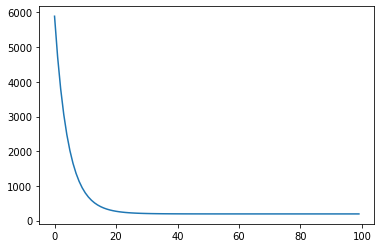

In [22]:
plt.plot(errors)

In [23]:
yh = model.predict(X)

In [24]:
yh[:10]

array([  40.68504805,   94.16686839,  119.19982308,  -38.23061123,
       -263.55980217,   15.68502439,   63.62452866,   53.69221497,
        -16.54736752,   37.13573491])

In [25]:
y[:10]

array([  43.5171099 ,   57.65141943,  123.08271761,  -43.37373343,
       -247.57689921,    8.53711187,   41.42818339,   51.97005873,
        -20.65603669,   57.77285488])